In [1]:
using LaTeXStrings
using CxxWrap: StdVector
using StatsPlots
using LinearAlgebra
using Corpuscles
using OnlineStats
using Distributed
using JLD2
using FileIO

gr()
theme(:gruvbox_dark)

In [2]:
pdgHistograms = Dict(
    :ss => CountMap(Int32),
    :bb => CountMap(Int32),
    :cc => CountMap(Int32),
    :gg => CountMap(Int32)
)

Dict{Symbol,CountMap{Int32,OrderedCollections.OrderedDict{Int32,Int64}}} with 4 entries:
  :cc => CountMap: n=0 | value=OrderedCollections.OrderedDict{Int32,Int64}()
  :ss => CountMap: n=0 | value=OrderedCollections.OrderedDict{Int32,Int64}()
  :gg => CountMap: n=0 | value=OrderedCollections.OrderedDict{Int32,Int64}()
  :bb => CountMap: n=0 | value=OrderedCollections.OrderedDict{Int32,Int64}()

In [4]:
bbHisto = load("bb.jld2")["pdgHistograms"][:bb]
ccHisto = load("cc.jld2")["pdgHistograms"][:cc]
ssHisto = load("ss.jld2")["pdgHistograms"][:ss]
ggHisto = load("gg.jld2")["pdgHistograms"][:gg]

CountMap: n=4077492 | value=OrderedCollections.OrderedDict{Int32,Int64}(22=>1968004,13=>102471,321=>158784,2212=>89538,2112=>86870,211=>1563662,130=>78094,11=>24623,14=>2403,12=>2507…)

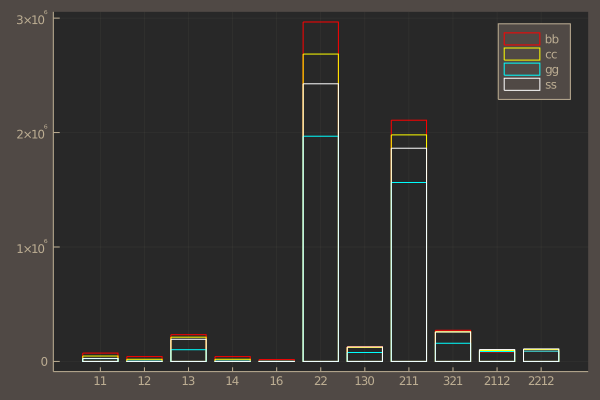

In [5]:
# before normalization
plot(bbHisto, fillcolor=nothing, linecolor=:red, label="bb")
plot!(ccHisto, fillcolor=nothing, linecolor=:yellow, label="cc")
plot!(ggHisto, fillcolor=nothing, linecolor=:cyan, label="gg")
plot!(ssHisto, fillcolor=nothing, linecolor=:white, label="ss")

In [6]:
pdgValues = sort(union([collect(keys(x)) for x in (bbHisto, ssHisto, ggHisto, ccHisto)]...))

11-element Array{Int32,1}:
   11
   12
   13
   14
   16
   22
  130
  211
  321
 2112
 2212

In [7]:
data = [get(sample.value, pdg, 0)/sample.n for pdg in pdgValues, sample in (bbHisto, ccHisto, ggHisto, ssHisto)]

11×4 Array{Float64,2}:
 0.0120512   0.0084973   0.00603876   0.0051653
 0.00698001  0.00339592  0.000614839  0.000106309
 0.0385831   0.0382233   0.0251309    0.0378945
 0.00696283  0.00340152  0.000589333  9.2213e-5
 0.00261707  6.09668e-5  0.000131453  7.04813e-6
 0.490065    0.484465    0.482651     0.474984
 0.0211317   0.0221901   0.0191525    0.0248263
 0.348264    0.357086    0.383486     0.364756
 0.0449822   0.0467302   0.0389416    0.0503951
 0.0136205   0.017226    0.0213048    0.020308
 0.014742    0.0187231   0.0219591    0.0214659

In [8]:
labels = [Particle(Int(pdg)).name for pdg in pdgValues]

11-element Array{String,1}:
 "e"
 "nu(e)"
 "mu"
 "nu(mu)"
 "nu(tau)"
 "gamma"
 "K(L)"
 "pi"
 "K"
 "n"
 "p"

In [9]:
unicodeLabels = [latexstring(Particle(Int(pdg)).latex) for pdg in pdgValues]

11-element Array{LaTeXString,1}:
 L"$e^{-}$"
 L"$\nu_{e}$"
 L"$\mu^{-}$"
 L"$\nu_{\mu}$"
 L"$\nu_{\tau}$"
 L"$\gamma$"
 L"$K_{L}^{0}$"
 L"$\pi^{+}$"
 L"$K^{+}$"
 L"$n$"
 L"$p$"

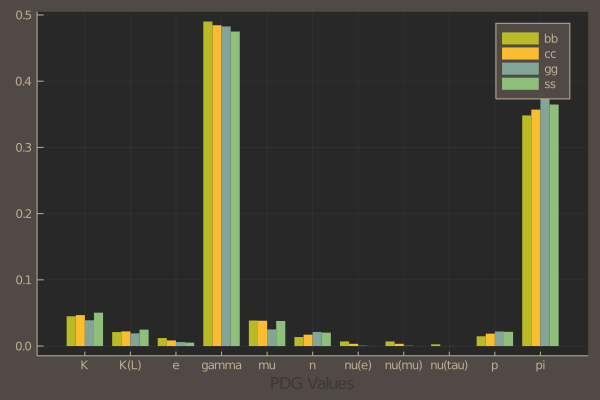

In [11]:
# following the recipe from https://github.com/JuliaPlots/StatsPlots.jl
ctg = repeat(["bb", "cc", "gg", "ss"], inner = length(pdgValues))
nam = repeat(labels, outer = 4)
groupedbar(nam, data, group=ctg, xlabel="PDG Values", lw=0)